In [1]:
import math
import pandas as pd
import matplotlib 
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import statistics
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sample_data=pd.read_csv('train.csv')

j=-1
for i in sample_data.X1:
    j=j+1
    if not isinstance(i,str):
        sample_data.X1[j]="NA"     
j1=-1
for i in sample_data.customer_active_segment:
    j1=j1+1
    if not isinstance(i,str):
        sample_data.customer_active_segment[j1]="NA" 
j2=-1
for i in sample_data.customer_stay_score:
    j2=j2+1
    if math.isnan(i):
        sample_data.customer_stay_score[j2]=0
j3=-1
for i in sample_data.customer_product_search_score:
    j3=j3+1
    if math.isnan(i):
        sample_data.customer_product_search_score[j3]=0
j4=-1
for i in sample_data.customer_product_variation_score:
    j4=j4+1
    if math.isnan(i):
        sample_data.customer_product_variation_score[j4]=0
j5=-1
for i in sample_data.customer_order_score:
    j5=j5+1
    if math.isnan(i):
        sample_data.customer_order_score[j5]=0
        
columns = sample_data.columns[1:-3]
sample_data[columns] = sample_data[columns].apply(lambda x: (x-x.min())/(x.max()-x.min())) 
sample_data

columns=sample_data.columns[8:12]
LE = LabelEncoder()
sample_data[columns] = sample_data[columns].apply(lambda columns: LE.fit_transform(columns))
sample_data

data_copy = sample_data.copy()
remove=data_copy[data_copy.columns[1:-3]]
remove = remove[(np.abs(stats.zscore(remove)) < 3).all(axis=1) == 1]
idx = list(remove.index)
data_copy =data_copy.loc[idx]
data_copy[data_copy.columns[1:-3]] = remove

Y = data_copy['customer_category']
X = data_copy[data_copy.columns[1:-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_prediction = clf.predict(X_test)

select = SelectFromModel(RandomForestClassifier())
select.fit(X_train, Y_train)
slc= X_train[X_train.columns[(select.get_support())]]

<ipython-input-1-befc88c75801>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data.X1[j]="NA"
<ipython-input-1-befc88c75801>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data.customer_active_segment[j1]="NA"
<ipython-input-1-befc88c75801>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data.customer_stay_score[j2]=0
<ipython-input-1-befc88c75801>:43: SettingWithCopyWarning: 
A value is trying to be set on

In [2]:
KNeighbor=KNeighborsClassifier(n_neighbors=6)
KNeighbor.fit(X_train, Y_train)
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train, Y_train)
clf2 = RandomForestClassifier()
clf2.fit(X_train, Y_train)
SVM=SVC(kernel="linear", probability=True)
SVM.fit(X_train, Y_train)
Regression=LogisticRegression()
Regression.fit(X_train, Y_train)

LogisticRegression()

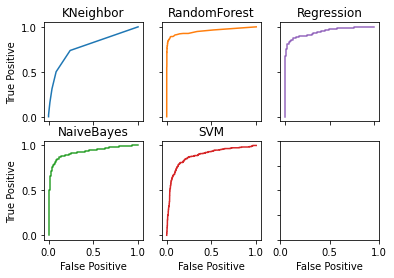

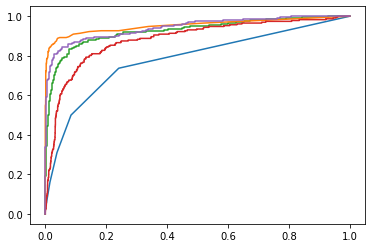

In [3]:
fig, axs = matplotlib.pyplot.subplots(2, 3)

Y1_pr = KNeighbor.predict_proba(X_test)[::,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, Y1_pr)
auc1 = metrics.roc_auc_score(Y_test, Y1_pr)
axs[0,0].plot(fpr1,tpr1)
axs[0, 0].set_title('KNeighbor')


Y2_pr = NaiveBayes.predict_proba(X_test)[::,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, Y2_pr)
auc2 = metrics.roc_auc_score(Y_test, Y2_pr)
axs[1, 0].plot(fpr2,tpr2, 'tab:green')
axs[1, 0].set_title('NaiveBayes')   


Y3_pr = clf2.predict_proba(X_test)[::,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_test, Y3_pr)
auc3 = metrics.roc_auc_score(Y_test, Y3_pr)
axs[0, 1].plot(fpr3,tpr3, 'tab:orange')
axs[0, 1].set_title('RandomForest')   


Y4_pr = SVM.predict_proba(X_test)[::,1]
fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_test, Y4_pr)
auc4 = metrics.roc_auc_score(Y_test, Y4_pr)
axs[1, 1].plot(fpr4,tpr4, 'tab:red')
axs[1, 1].set_title('SVM') 

Y5_pr = Regression.predict_proba(X_test)[::,1]
fpr5, tpr5, thresholds5 = metrics.roc_curve(Y_test, Y5_pr)
auc5 = metrics.roc_auc_score(Y_test, Y5_pr)
axs[0,2].plot(fpr5,tpr5,'tab:purple')
axs[0,2].set_title('Regression')

for ax in axs.flat:
    ax.set(xlabel='False Positive', ylabel='True Positive')
for ax in axs.flat:
    ax.label_outer()
matplotlib.pyplot.show()
matplotlib.pyplot.plot(fpr1,tpr1,fpr2,tpr2, 'tab:green',fpr3,tpr3, 'tab:orange',fpr4,tpr4, 'tab:red',fpr5,tpr5,'tab:purple')
matplotlib.pyplot.show()

In [4]:
array=[["KNeighbor:",KNeighbor],["Naive Bayes:",NaiveBayes],["Random Forest:",clf2],["SVM:",SVM],["Regression:",Regression]]
v = []
for a in array:
    a[1].fit(X_train, Y_train)
    v1 = a[1].predict(X_test)
    v.append([a[0], v1])
for i in v:
    print(i[0], metrics.accuracy_score(Y_test, i[1]))

KNeighbor: 0.919782460910945
Naive Bayes: 0.9486743711760707
Random Forest: 0.977906186267845
SVM: 0.9228416043507818
Regression: 0.9643099932019035
